<a href="https://colab.research.google.com/github/Talos6/AIPI590-Interpretable-ML/blob/implementation/AIPI590_Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 XAI Interpretable ML

In [75]:
# Standard libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
!pip install pygam
from pygam import LogisticGAM, s, f

# Root folder
ROOT = os.path.dirname(os.path.abspath('__file__'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 44.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


## Data Source
Kaggle dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

### Load Data
Data downloaded as CSV file and load to Script.

In [17]:
df = pd.read_csv(os.path.join(ROOT, 'data.csv'))

In [21]:
# rows x cols
df.shape

(7043, 21)

In [23]:
# features
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


### Data Preprocessing

In [55]:
# turn TotalCharges to numeric value
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Replace missing values in TotalCharges with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

## EDA

We are going to perform the exploratory analysis of the dataset to understand the relationships between different features and the target variable (churn). We are going to use bar plots for categorical features and box plots for numerical features.
Visualizing them would give us assumption for linear model, logistic regression or GAM are met.

### Gender vs Churn

Gender has no significant difference in churn between males and females.

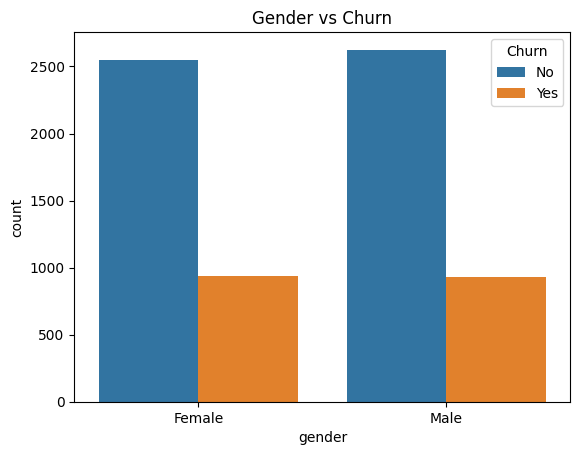

In [31]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs Churn')
plt.show()

### SeniorCitizen vs Churn

Senior citizens have a higher churn percentage compared to non-senior citizens, towards the assumption of linear relationship.

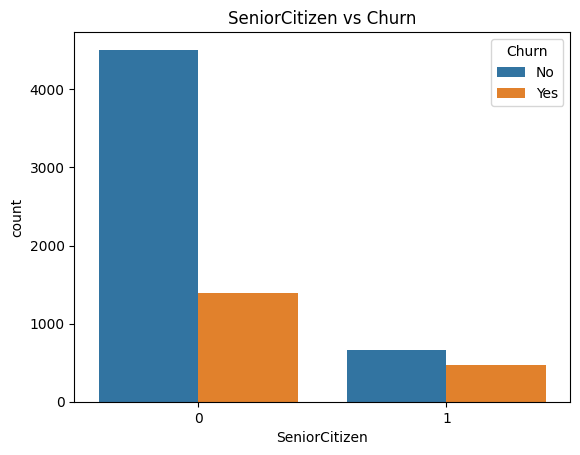

In [32]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('SeniorCitizen vs Churn')
plt.show()

### Partner vs Churn

Customers without a partner are more likely to churn, towards the assumption of linear relationship.

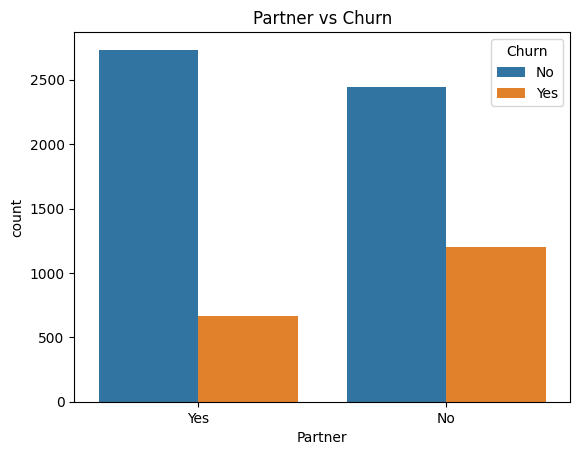

In [33]:
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Partner vs Churn')
plt.show()

### Dependents vs Churn

Customers without dependents are more likely to churn, towards the assumption of linear relationship.

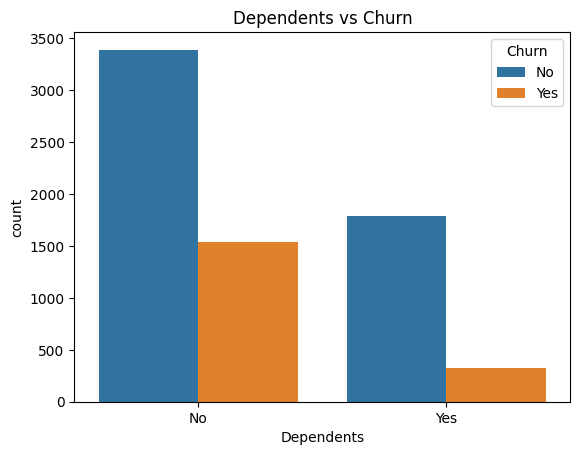

In [34]:
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Dependents vs Churn')
plt.show()

### Tenure vs Churn

Lower tenure is strongly associated with higher churn probability, especially in the first few months. However, since there is variances when tenure between 15 - 30 months. It is likely towards an non-linear relationship.

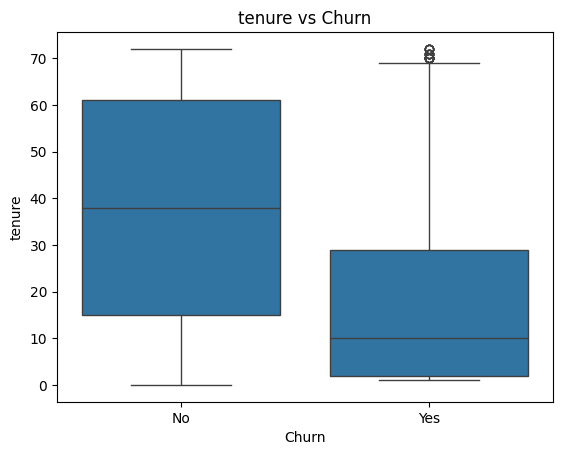

In [35]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('tenure vs Churn')
plt.show()

### PhoneService vs Churn

Churn rates are slightly higher for those without phone service, towards an linear relationship.

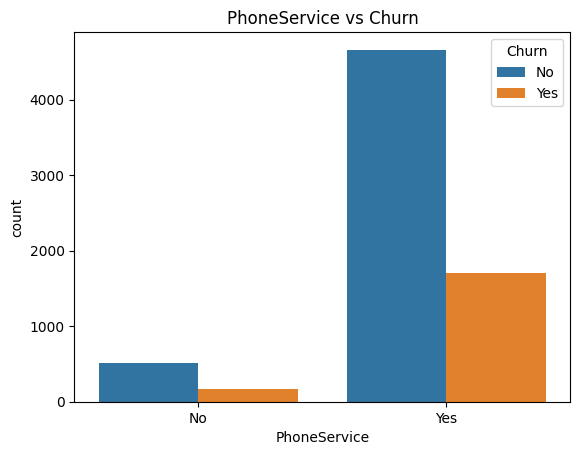

In [37]:
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title('PhoneService vs Churn')
plt.show()

### MultipleLines vs Churn

MultipleLines shows variant churn rate, towards an non-linear relationship.

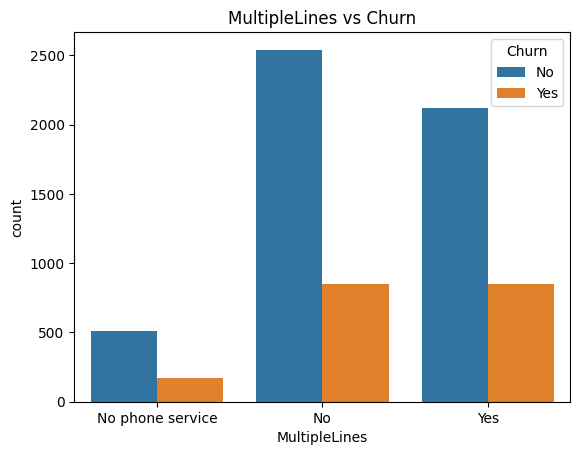

In [39]:
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('MultipleLines vs Churn')
plt.show()

### InternetService vs Churn

Fiber optic users churn more compared to DSL and no internet users, towards an non-linear relationship.

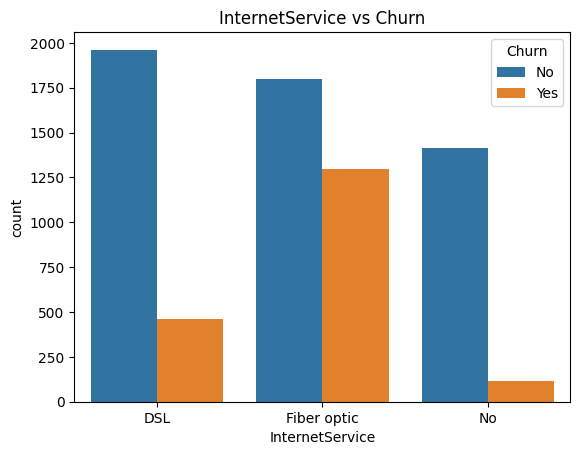

In [40]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('InternetService vs Churn')
plt.show()

### Online Security vs Churn

Customers without online security have higher churn rates but varies depends on have interrnet service or not, towards an non-linear relationship.

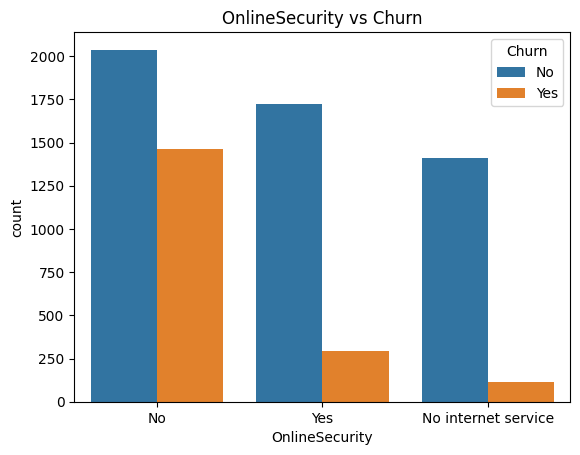

In [41]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('OnlineSecurity vs Churn')
plt.show()

### OnlineBackup vs Churn

Customers without online backup have higher churn rates but varies depends on have interrnet service or not, towards an non-linear relationship.

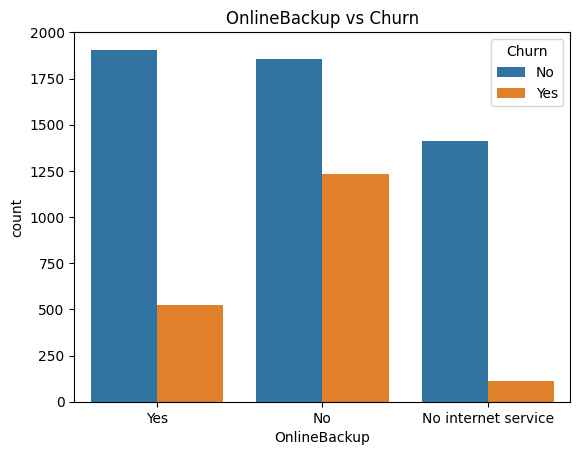

In [43]:
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.title('OnlineBackup vs Churn')
plt.show()

### DeviceProtection vs Churn

Customer without device protection is more likely to churn, but varies on have internet service or not, towards an non-linear relationship.

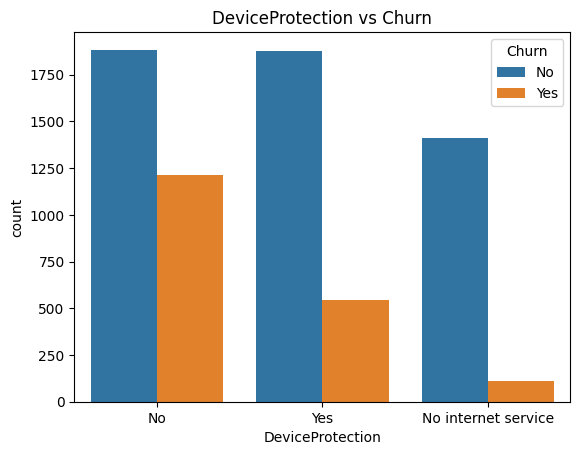

In [44]:
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.title('DeviceProtection vs Churn')
plt.show()

### TechSupport vs Churn

Customer without tech support are more likely to churn, it also varies when customer has internet service or not, towards an non-linear relationship.

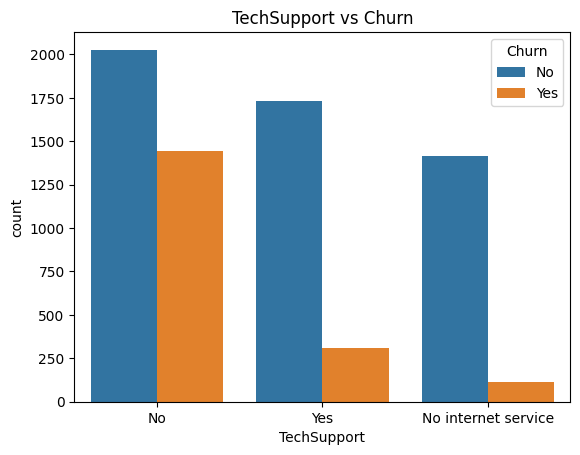

In [45]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('TechSupport vs Churn')
plt.show()

### StreamingTV vs Churn

StreamingTV shows similar churn rate without a strong correlation, also varies in having internet service or not.

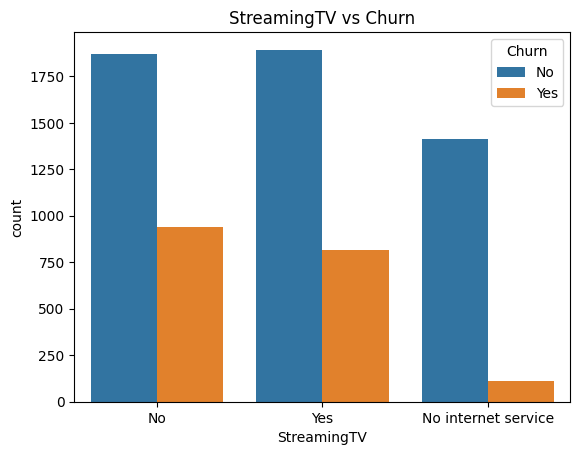

In [46]:
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.title('StreamingTV vs Churn')
plt.show()

### StreamingMovies vs Churn

Similar to StreamTV that StreamingMovies has not a strong correlation with Churn, also varies to no internet service.

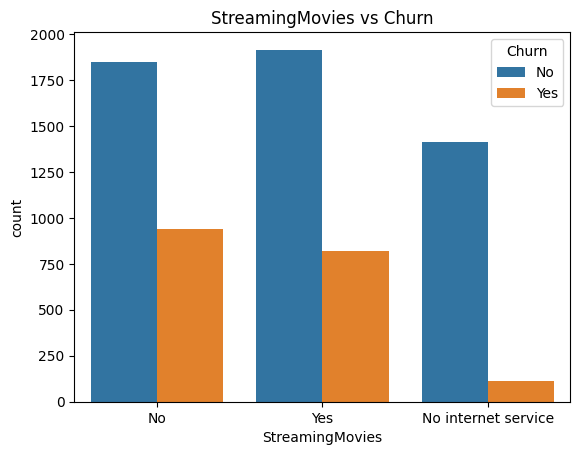

In [47]:
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.title('StreamingMovies vs Churn')
plt.show()

### Contract vs Churn

Month-to-Month contract has significant strong churn rate comparing to the other two, towards an non-linear relationship.

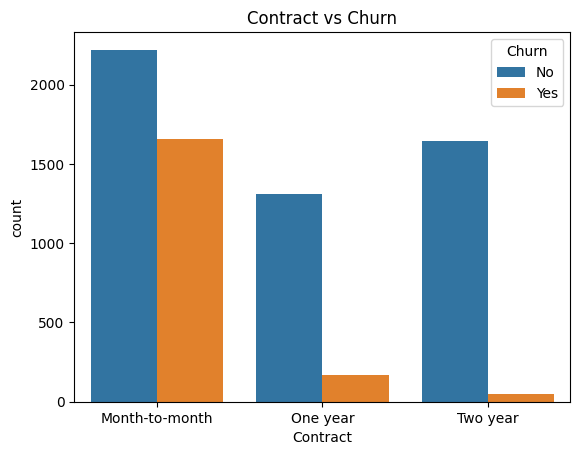

In [48]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract vs Churn')
plt.show()

### PaperlessBilling vs Churn

Paperless billing is associated with higher churn rates, towards linear relationship.

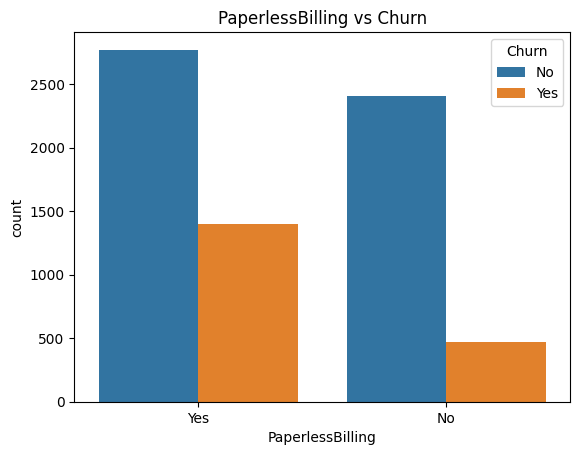

In [49]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('PaperlessBilling vs Churn')
plt.show()

### PaymentMethod vs Churn

Electronic Check has significant higher churn rate compared to the rest, towards an non-linear relationship.

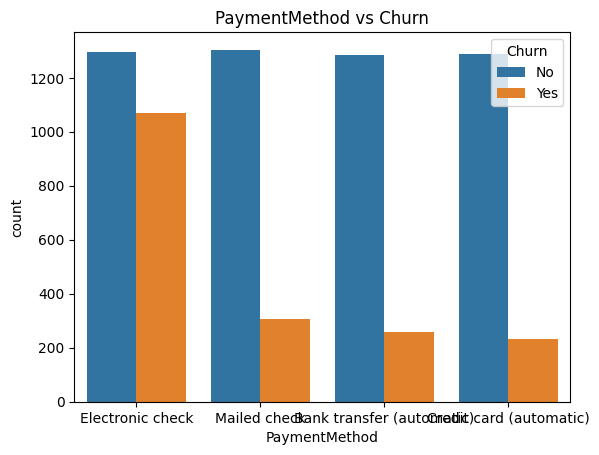

In [50]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('PaymentMethod vs Churn')
plt.show()

### MonthlyCharges vs Churn

Customers with higher monthly charges tend to churn more, but varies in the range 60 - 90, towards an non-linear relationship.

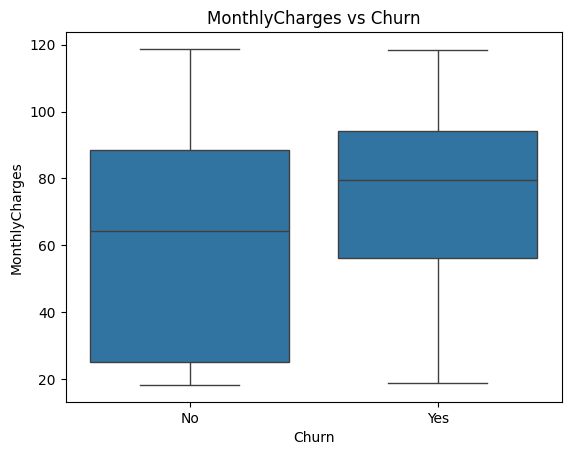

In [51]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')
plt.show()

### TotalCharges vs Churn

This shows varies behavior since it depends on monthly charges and tenures, towards an non-linear relationship.

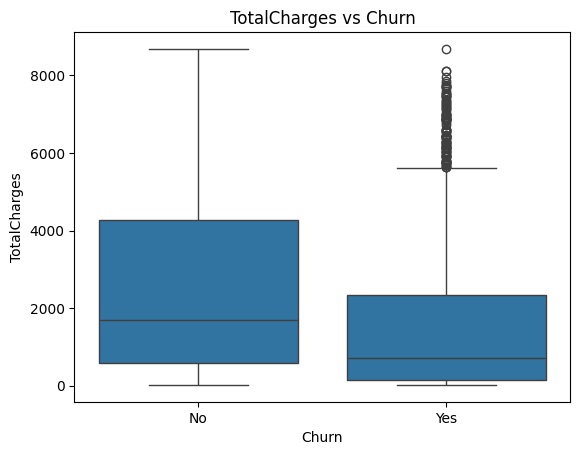

In [52]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('TotalCharges vs Churn')
plt.show()

### Summary

Most of the features, including categorical and numerical, shows relationship with target variable (Churn) in a non-linear fashion. Futhermore, several features have dependencies or multi-colinearity with other features.

This finding suggest that GAMs might better capture these relationships compared to linear or logistic models.

## Linear Regression

In [71]:
# Convert churn into a numeric variable: 0 for 'No', 1 for 'Yes'
df['ChurnNum'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Separate categorical and numerical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convert categorical variables into dummy/one-hot encoding
df_encoded = pd.get_dummies(df[categorical_features + numerical_features], drop_first=True)

# Separate target variable and feature set
X = df_encoded
y = df['ChurnNum']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Extract coefficients from the model
coefficients_linear = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})

# build linear model equation
equation_linear = f"Churn = {linear_model.intercept_:.4f}"
for i, feature in enumerate(X.columns):
    coef = linear_model.coef_[i]
    equation_linear += f" + ({coef:.4f}) * {feature}"

mse, r2, equation_linear, coefficients_linear.sort_values(by='Coefficient', ascending=False)

(0.13409956305380902,
 0.31106101359366045,
 'Churn = 0.5217 + (0.0378) * SeniorCitizen + (-0.0019) * tenure + (-0.0044) * MonthlyCharges + (-0.0000) * TotalCharges + (-0.0085) * gender_Male + (0.0071) * Partner_Yes + (-0.0231) * Dependents_Yes + (0.0265) * PhoneService_Yes + (-0.0265) * MultipleLines_No phone service + (0.0714) * MultipleLines_Yes + (0.2812) * InternetService_Fiber optic + (-0.0364) * InternetService_No + (-0.0364) * OnlineSecurity_No internet service + (-0.0350) * OnlineSecurity_Yes + (-0.0364) * OnlineBackup_No internet service + (-0.0008) * OnlineBackup_Yes + (-0.0364) * DeviceProtection_No internet service + (0.0218) * DeviceProtection_Yes + (-0.0364) * TechSupport_No internet service + (-0.0270) * TechSupport_Yes + (-0.0364) * StreamingTV_No internet service + (0.0882) * StreamingTV_Yes + (-0.0364) * StreamingMovies_No internet service + (0.1070) * StreamingMovies_Yes + (-0.1073) * Contract_One year + (-0.0808) * Contract_Two year + (0.0454) * PaperlessBilling_Ye

**Summary**

Linear model interpretation shown above with coefficients retrieved for each feature.

From the interpretation we can tell customer who has fiber optic internet, has streaming movies, has streaming TV, has multiple lines, and using electronic checks as payment method are more likely to churn (top five most significant features).

Accessing the model performance, it has MSE 0.1341 and R-squared error 0.31, which indicates the linear model has limited predictive power, likely due to the non-linear relationship between some features and churn.

## Logistic regression


In [72]:
# Build the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict probabilities and binary outcomes on the test set
y_prob = logistic_model.predict_proba(X_test)[:, 1]  # Get probability of churn (class=1)
y_pred_logistic = logistic_model.predict(X_test)

# Calculate model performance metrics
accuracy = accuracy_score(y_test, y_pred_logistic)
roc_auc = roc_auc_score(y_test, y_prob)

# Extract coefficients from the logistic regression model
coefficients_logistic = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})

# Form the equation of interpretation
equation_logistic = f"log(odds) = {logistic_model.intercept_[0]:.4f}"
for i, feature in enumerate(X.columns):
    coef = logistic_model.coef_[0][i]
    equation_logistic += f" + ({coef:.4f}) * {feature}"

accuracy, roc_auc, equation_logistic, coefficients_logistic.sort_values(by='Coefficient', ascending=False)

(0.8183108587650816,
 0.8604487770037368,
 'log(odds) = -0.1859 + (0.2300) * SeniorCitizen + (-0.0603) * tenure + (0.0046) * MonthlyCharges + (0.0003) * TotalCharges + (-0.0431) * gender_Male + (0.1067) * Partner_Yes + (-0.1602) * Dependents_Yes + (-0.4527) * PhoneService_Yes + (0.2693) * MultipleLines_No phone service + (0.2144) * MultipleLines_Yes + (0.5598) * InternetService_Fiber optic + (-0.1171) * InternetService_No + (-0.1171) * OnlineSecurity_No internet service + (-0.5985) * OnlineSecurity_Yes + (-0.1171) * OnlineBackup_No internet service + (-0.2539) * OnlineBackup_Yes + (-0.1171) * DeviceProtection_No internet service + (-0.0901) * DeviceProtection_Yes + (-0.1171) * TechSupport_No internet service + (-0.5460) * TechSupport_Yes + (-0.1171) * StreamingTV_No internet service + (0.1458) * StreamingTV_Yes + (-0.1171) * StreamingMovies_No internet service + (0.2546) * StreamingMovies_Yes + (-0.3921) * Contract_One year + (-0.7051) * Contract_Two year + (0.4197) * PaperlessBilling_

**Summary**

Logistic model log-odds interpretation shown above with coefficients retrieved for each feature.

From the interpretation we can tell customer who has fiber optic internet, has paperless billing, no multiple lines, has streaming movies, and using electronic checks as payment method are more likely to churn (top five most significant features).

Accessing the model performance, it has 81.83% in accuracy and ROC-AUC score 0.86, which indicates the model correctly classified 81.83% of the churn cases and high ROC-AUC score represents a good discriminatory power in distinguish between churn or not.

## GAM

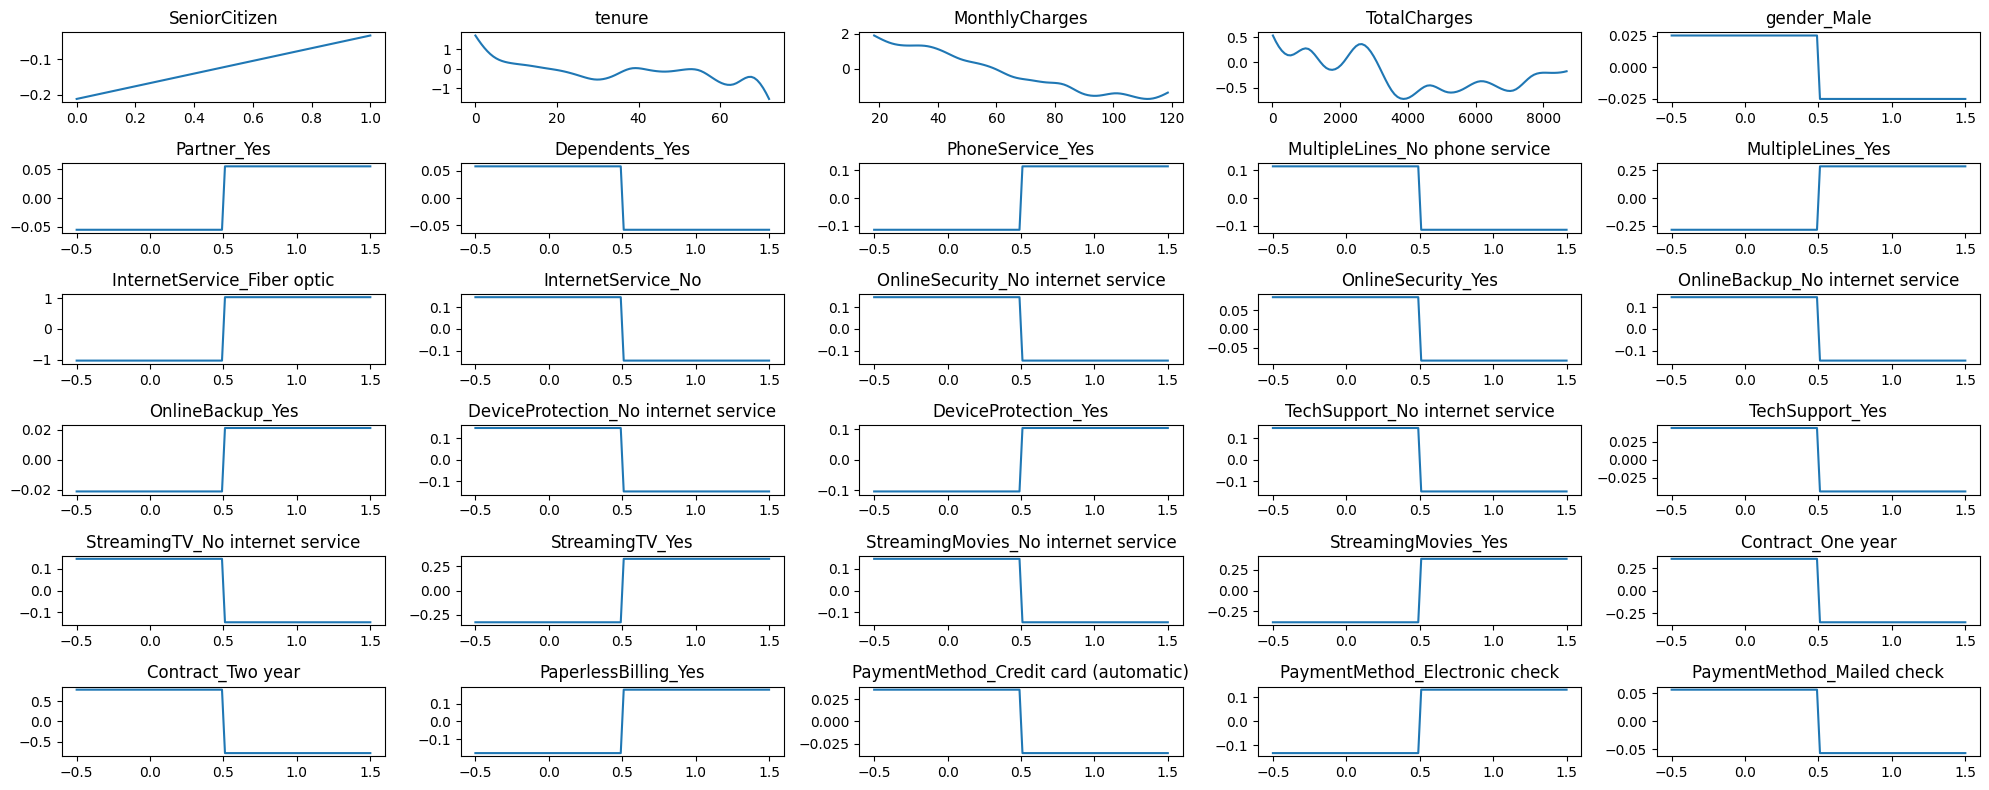

(0.8126330731014905, 0.8634894469344871)

In [90]:
# Build a GAM model
gam = LogisticGAM(
    s(0) +  # SeniorCitizen
    s(1) +  # tenure
    s(2) +  # MonthlyCharges
    s(3) +  # TotalCharges
    f(4) +  # gender_Male
    f(5) +  # Partner_Yes
    f(6) +  # Dependents_Yes
    f(7) +  # PhoneService_Yes
    f(8) +  # MultipleLines_No phone service
    f(9) +  # MultipleLines_Yes
    f(10) + # InternetService_Fiber optic
    f(11) + # InternetService_No
    f(12) + # OnlineSecurity_No internet service
    f(13) + # OnlineSecurity_Yes
    f(14) + # OnlineBackup_No internet service
    f(15) + # OnlineBackup_Yes
    f(16) + # DeviceProtection_No internet service
    f(17) + # DeviceProtection_Yes
    f(18) + # TechSupport_No internet service
    f(19) + # TechSupport_Yes
    f(20) + # StreamingTV_No internet service
    f(21) + # StreamingTV_Yes
    f(22) + # StreamingMovies_No internet service
    f(23) + # StreamingMovies_Yes
    f(24) + # Contract_One year
    f(25) + # Contract_Two year
    f(26) + # PaperlessBilling_Yes
    f(27) + # PaymentMethod_Credit card (automatic)
    f(28) + # PaymentMethod_Electronic check
    f(29)   # PaymentMethod_Mailed check
)

# Fit the GAM model to the training data
gam.fit(X_train, y_train)

# Predict probabilities and binary outcomes on the test set
y_prob_gam = gam.predict_proba(X_test)
y_pred_gam = gam.predict(X_test)

# Assess model performance
accuracy_gam = accuracy_score(y_test, y_pred_gam)
roc_auc_gam = roc_auc_score(y_test, y_prob_gam)

# Interpret GAM by visualizing the partial dependence of key features
plt.figure(figsize=(20, 8))
for i, term in enumerate(gam.terms[:-1], start=1):
    plt.subplot(6, 5, i)
    XX = gam.generate_X_grid(term=i-1)
    plt.plot(XX[:, i-1], gam.partial_dependence(term=i-1, X=XX))
    plt.title(X.columns[i-1])
plt.tight_layout()
plt.show()

accuracy_gam, roc_auc_gam


**Summary**

GAM model spline and factor interpretation shown above with respect for each feature.

From the interpretation we can tell how each feature contributes to the probability of churn. These plots reveal non-linear relationships captured by the model.

Accessing the model performance, it has 81.26% in accuracy and ROC-AUC score 0.86, which indicates the model correctly classified 81.26% of the churn cases and high ROC-AUC score represents a good discriminatory power in distinguish between churn or not.

## Model Comparison

**Linear Regression**

Pros: simple and easy to interpret, the interpretation equation is easy to understand, works well if the relationship is truly linear.

Cons: Incorrect for binary target, where churn is a binary variable and the model outcome is not constrained to [0,1] which can produce invalid probabilities. It struggles with non-linear relationship and shown in the R-squared error 0.31, only 34% variance has been explained.

**Logistic Regression**

Pros: medium to deliver the interpretation, the interpretation is somewhat easy to understand but not as easy as linear model. Works well in binary classification and for features who is significant and linear related. It directly output the probability which is the final goal.

Cons: Assumes linearity in log-odds which might not be true for all features, failed to capture the non-linear relationship and may struggle to capture complex patterns or interactions between features.

**GAM**

Pros: model non-linear relationship betweeen features and target, and visualize how each feature contribute to the target, showing interpretability.

Cons: It is more complex comparing to the other two in terms of implementation and computation, it incur a higher probability to overfitting and the actual interpretation is harder to explain.

## Conclusion

I would recommend the telecom company to use logistic regression model. It shows the best performance score and competitive interpretability power. It's interpretation is easy to explain and understand, better for business analysis. Furthermore, it turns out the features who has the most contribution towards outcome is not non-linear relationship so GAM here is an overkill. Logistic regression is easier to implement, fast to run and consume less resources.